<a href="https://colab.research.google.com/github/amod404/Practice_Project/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [2]:

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [97]:
!kaggle datasets download -d johnsmith88/heart-disease-dataset

Dataset URL: https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset
License(s): unknown
  0% 0.00/6.18k [00:00<?, ?B/s]
100% 6.18k/6.18k [00:00<00:00, 22.2MB/s]


In [98]:
!unzip heart-disease-dataset.zip

Archive:  heart-disease-dataset.zip
  inflating: heart.csv               


In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import numpy as np
from tensorflow.keras import Sequential, layers, regularizers
from tensorflow.keras.layers import LeakyReLU, Dropout, Dense
from tensorflow.keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


In [239]:
df = pd.read_csv("/content/heart.csv")

In [240]:
z_scores = np.abs(zscore(df))

# Keep only rows where all features have z-score < threshold
df = df[(z_scores < 3).all(axis=1)]


In [241]:
# Compute correlation of all columns with the 'output' column
correlations = df.corr()['target'].drop('target')  # Drop self-correlation
print(correlations)

age        -0.227225
sex        -0.303739
cp          0.408999
trestbps   -0.114757
chol       -0.112342
fbs        -0.023629
restecg     0.127580
thalach     0.429920
exang      -0.429825
oldpeak    -0.431854
slope       0.322791
ca         -0.466639
thal       -0.352502
Name: target, dtype: float64


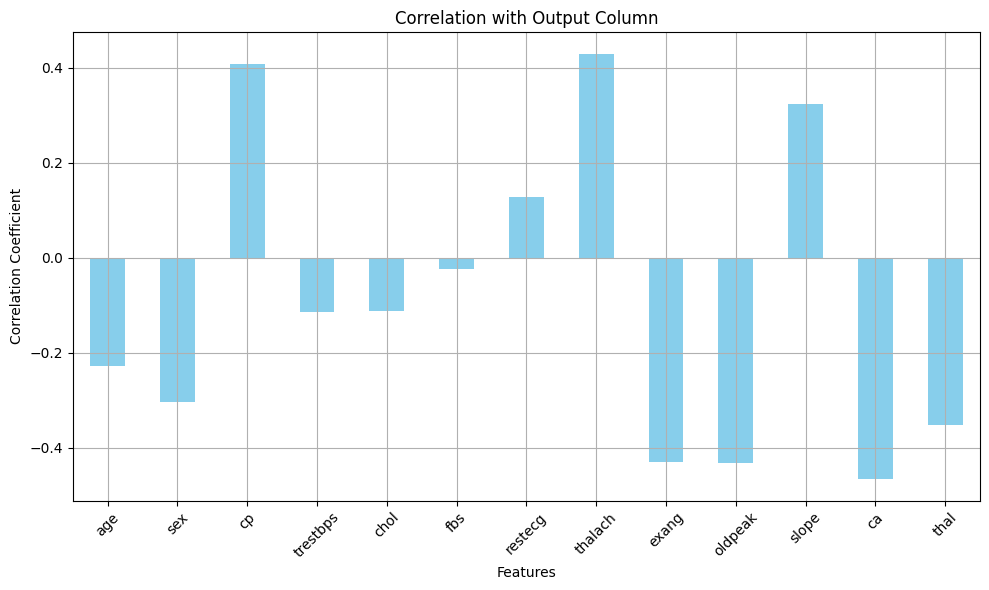

In [242]:
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Correlation with Output Column')
plt.ylabel('Correlation Coefficient')
plt.xlabel('Features')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [243]:
X = df.iloc[:,:-1]

In [244]:
y = df["target"]

In [245]:
X.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
75,47,1,2,138,257,0,0,156,0,0.0,2,0,2
257,64,0,0,180,325,0,1,154,1,0.0,2,0,2
847,61,1,0,138,166,0,0,125,1,3.6,1,1,2
764,63,1,0,140,187,0,0,144,1,4.0,2,2,3
163,48,1,0,124,274,0,0,166,0,0.5,1,0,3


In [246]:
print(X.shape)

(969, 13)


In [247]:
print(y.shape)

(969,)


In [248]:
for column in X.columns:
    print(f"Value counts for '{column}':")
    print(X[column].value_counts())
    print("-" * 40)

Value counts for 'age':
age
58    64
57    57
54    50
59    46
51    39
60    37
52    36
44    36
62    34
64    34
56    32
41    32
61    31
63    28
42    26
55    26
66    25
45    25
67    24
65    24
53    23
43    23
46    23
48    23
50    21
47    18
49    17
35    15
70    14
39    14
68    12
40    11
71    11
69     9
34     6
37     6
29     4
38     4
76     3
77     3
74     3
Name: count, dtype: int64
----------------------------------------
Value counts for 'sex':
sex
1    680
0    289
Name: count, dtype: int64
----------------------------------------
Value counts for 'cp':
cp
0    468
2    264
1    160
3     77
Name: count, dtype: int64
----------------------------------------
Value counts for 'trestbps':
trestbps
120    124
130    123
140    100
110     64
150     51
138     34
125     34
160     33
128     32
112     30
132     25
118     24
108     21
135     20
124     20
152     17
145     17
170     15
134     14
100     14
122     14
136     11
180     10
126

In [249]:
X_encoded = pd.get_dummies(X,columns=['sex','thal','ca','slope','exang','restecg','fbs','cp'],drop_first=False)

In [250]:
X_encoded.sample(5)

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,thal_1,thal_2,thal_3,...,exang_1,restecg_0,restecg_1,restecg_2,fbs_0,fbs_1,cp_0,cp_1,cp_2,cp_3
315,42,148,244,178,0.8,False,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True
325,56,140,294,153,1.3,True,False,False,True,False,...,False,True,False,False,True,False,False,True,False,False
15,34,118,210,192,0.7,True,False,False,True,False,...,False,False,True,False,True,False,False,True,False,False
183,42,130,180,150,0.0,False,True,False,True,False,...,False,False,True,False,True,False,False,False,True,False
562,42,120,209,173,0.0,True,False,False,True,False,...,False,False,True,False,True,False,False,False,True,False


In [251]:
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

In [252]:
X_train.shape

(775, 28)

In [253]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [254]:
model = Sequential([

    Dense(256, kernel_regularizer=regularizers.l2(0.01),input_shape=(28,)),
    LeakyReLU(alpha=0.01),
    Dropout(0.1),

    Dense(256, kernel_regularizer=regularizers.l2(0.01)),
    LeakyReLU(alpha=0.01),
    Dropout(0.15),

    Dense(256, kernel_regularizer=regularizers.l2(0.01)),
    LeakyReLU(alpha=0.01),
    Dropout(0.20),

    Dense(256, kernel_regularizer=regularizers.l2(0.01)),
    LeakyReLU(alpha=0.01),
    Dropout(0.25),

    Dense(128, kernel_regularizer=regularizers.l2(0.01)),
    LeakyReLU(alpha=0.01),
    Dropout(0.25),

    Dense(128, kernel_regularizer=regularizers.l2(0.01)),
    LeakyReLU(alpha=0.01),
    Dropout(0.3),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

model.compile(
    optimizer="adam",
    loss='binary_crossentropy',
    metrics=['accuracy']
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [255]:
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # split your train set if needed
    epochs=400,
    batch_size=32,
    verbose=1
)

Epoch 1/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 259ms/step - accuracy: 0.6207 - loss: 10.6146 - val_accuracy: 0.8323 - val_loss: 7.2865
Epoch 2/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8344 - loss: 6.4688 - val_accuracy: 0.6839 - val_loss: 4.6884
Epoch 3/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7742 - loss: 4.0832 - val_accuracy: 0.8387 - val_loss: 2.8447
Epoch 4/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8563 - loss: 2.5541 - val_accuracy: 0.8645 - val_loss: 1.8613
Epoch 5/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8345 - loss: 1.7580 - val_accuracy: 0.8581 - val_loss: 1.3379
Epoch 6/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8589 - loss: 1.2486 - val_accuracy: 0.9032 - val_loss: 0.9703
Epoch 7/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8683 - loss: 0.9553 - val_accuracy: 0.8645 - val_loss: 0.8219
Epoch 8/400
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8559 - loss: 0.8291 - val_accuracy: 0.8968

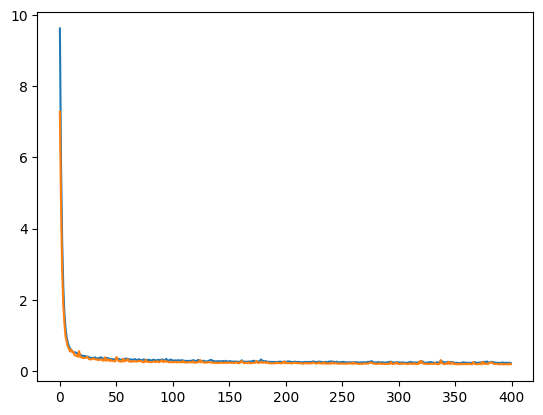

In [256]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [257]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.9752 - loss: 0.2271
Test Accuracy: 0.9794
